<a href="https://colab.research.google.com/github/roapple10/Content-based-recommender-system/blob/master/Content_based_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/hands-on-content-based-recommender-system-using-python-1d643bf314e4

In [ ]:
pip install sentence_transformers

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/roapple10/Content-based-recommender-system/master/imdb_top_1000.csv')
X = np.array(data.Overview)
X

In [7]:
data = data[['Genre','Overview','Series_Title']]
data.head()

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


Imagine you are doing a classification task and you want to use Support Vector Machines. Well, of course, you will need to have vectors to do that. So if you have to classify a text you will first convert the text into a vector and then apply the SVM algorithm.
.
Use BERT to convert our text into a vector
Get the cosine similarity (the cosine of the angle between the two vectors) of a fixed movie (vector) and all the other ones
Pick the movies (vectors) with the largest cosine similarity. We are going to pick 5 of them.

3.1 From text to vector:
Here’s how you convert a text to a vector:

In [8]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

3.2 PCA (optional)
I’m now using a very known method to reduce the dimensionality of our dataset (Principal Components Analysis) . It is just to plot it and give you an idea of the result of the text-vector conversion so you can safely skip it.

In [10]:
X = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.986181,1.695244,4.334352,-2.355090,2.237543
1,-0.131719,0.887963,4.695687,-2.713095,-1.792599
2,-5.688411,-1.776811,-0.750716,-0.705824,4.126599
3,-1.211429,4.458793,1.582474,-3.535905,-2.344908
4,-0.971367,-2.374362,3.171930,3.072523,-0.170308


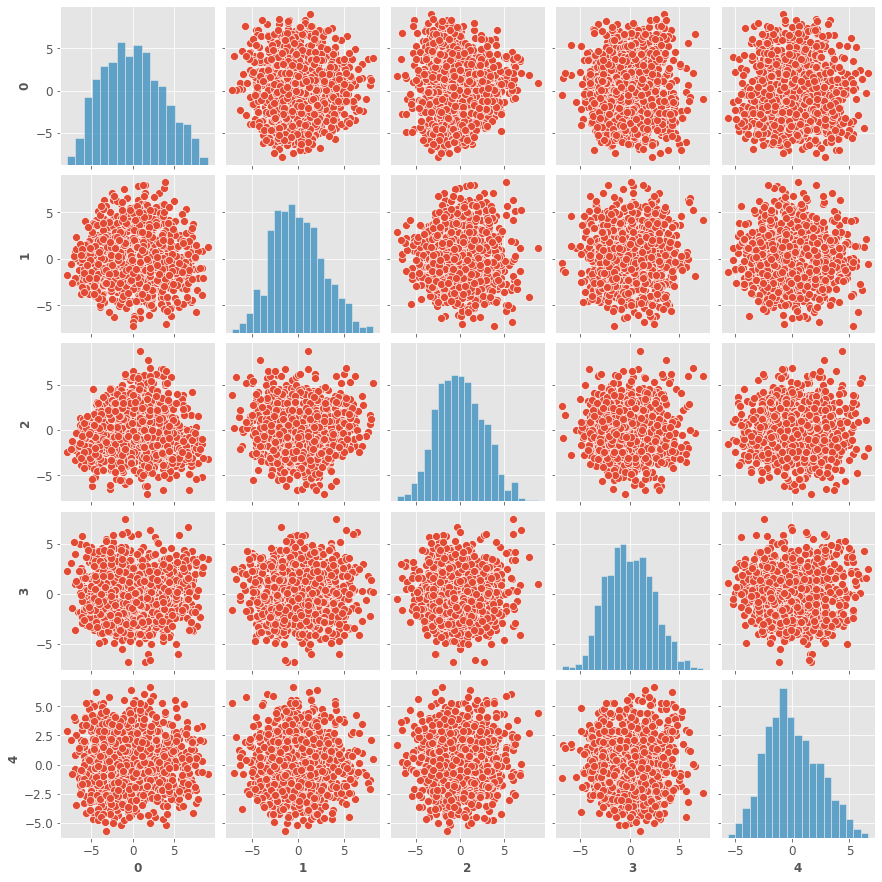

In [11]:
sns.pairplot(pca_data)

Cosine Similarity and Recommendation Function
Here is how to compute the cosine similarity (one line of code) and the function that we’ll use to get our recommendations:

In [12]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

The Results
Let’s plot some recommendations:

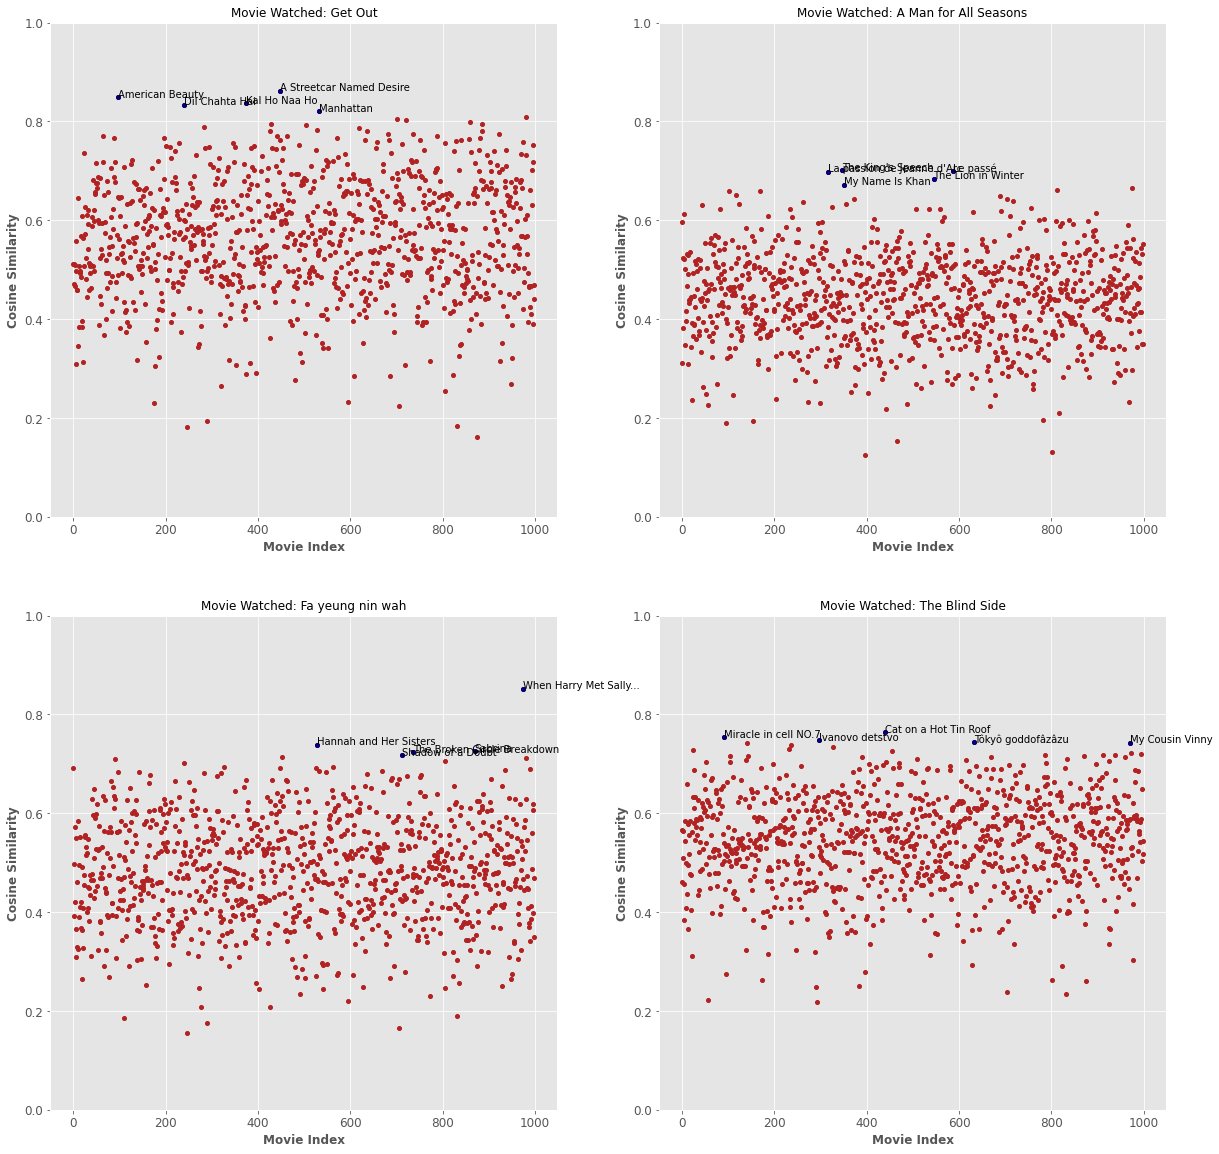

In [15]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [16]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: Joker 

The number 1 recommended movie is this one: Dirty Harry 

The number 1 recommended movie is this one: Batman Begins 

The number 1 recommended movie is this one: Guardians of the Galaxy 

The number 1 recommended movie is this one: Death Note: Desu nôto 



{'Index': [33, 853, 155, 339, 762],
 'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object)}

In [17]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 2 recommended movie is this one:
 When a madman calling himself "the Scorpio Killer" menaces the city, tough-as-nails San Francisco Police Inspector "Dirty" Harry Callahan is assigned to track down and ferret out the crazed psychopath. 

The plot of the number 3 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 4 recommended movie is t

{'Index': [33, 853, 155, 339, 762],
 'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object)}

In [18]:
give_recommendations(65,True,True,True)

The watched movie is this one: Taare Zameen Par 

The number 1 recommended movie is this one: Jagten 

The number 1 recommended movie is this one: What's Eating Gilbert Grape 

The number 1 recommended movie is this one: Scent of a Woman 

The number 1 recommended movie is this one: The Boy in the Striped Pyjamas 

The number 1 recommended movie is this one: Harry Potter and the Sorcerer's Stone 

The plot of the watched movie is this one:
 An eight-year-old boy is thought to be a lazy trouble-maker, until the new art teacher has the patience and compassion to discover the real problem behind his struggles in school. 

The plot of the number 1 recommended movie is this one:
 A teacher lives a lonely life, all the while struggling over his son's custody. His life slowly gets better as he finds love and receives good news from his son, but his new luck is about to be brutally shattered by an innocent little lie. 

The plot of the number 2 recommended movie is this one:
 A young man in a 

{'Index': [88, 658, 398, 616, 947],
 'Movies': array(['Jagten', "What's Eating Gilbert Grape", 'Scent of a Woman',
        'The Boy in the Striped Pyjamas',
        "Harry Potter and the Sorcerer's Stone"], dtype=object)}

this is the way you store your recommendation into a dataframe:

In [19]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [20]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
421,The Last Picture Show,Withnail & I,The Best Years of Our Lives,Ayla: The Daughter of War,The Wild Bunch,The Grapes of Wrath
593,About Time,Toki o kakeru shôjo,Zindagi Na Milegi Dobara,Midnight Cowboy,Gegen die Wand,Sabrina
320,The General,À bout de souffle,The Outlaw Josey Wales,Dead Man,Butch Cassidy and the Sundance Kid,Rupan sansei: Kariosutoro no shiro
999,The 39 Steps,Vikram Vedha,Baby,The Bourne Ultimatum,The Bourne Supremacy,The Warriors
947,Harry Potter and the Sorcerer's Stone,The Secret of Kells,Harry Potter and the Prisoner of Azkaban,Taare Zameen Par,La vita è bella,How to Train Your Dragon
